        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


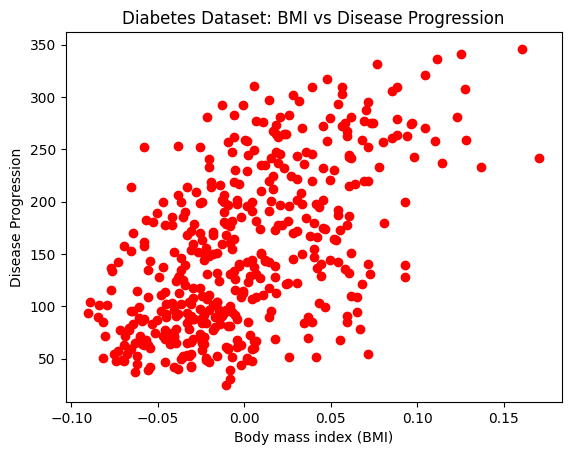

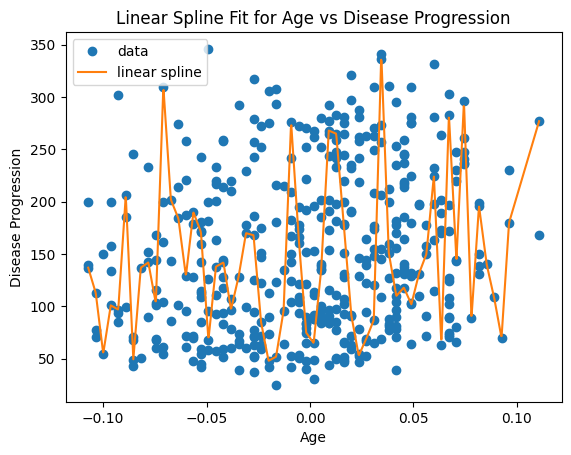

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, BSpline, CubicSpline, splrep, splev
from sklearn import datasets

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
diabetes_df = pd.DataFrame(data= np.c_[diabetes['data'], diabetes['target']],
                           columns= diabetes['feature_names'] + ['target'])

# Display the first few rows of the dataset
print(diabetes_df.head())

# Select a feature for simple linear regression, for example, 'bmi'
X = diabetes_df['bmi'].values.reshape(-1, 1)
y = diabetes_df['target']

# Scatter plot of BMI vs diabetes progression
plt.scatter(X, y, color='red')
plt.xlabel('Body mass index (BMI)')
plt.ylabel('Disease Progression')
plt.title('Diabetes Dataset: BMI vs Disease Progression')
plt.show()

# Example of using Splines
# We will use the 'age' feature for spline fitting
age = diabetes_df['age']
progression = diabetes_df['target']

# Create a linear spline
age_sorted, idx = np.unique(age, return_index=True)
progression_sorted = progression[idx]
linspline = interp1d(age_sorted, progression_sorted)

# Sample points for plot
xx = np.linspace(age.min(), age.max(), 1000)

# Plot the linear spline approximation
plt.figure()
plt.plot(age, progression, 'o', label='data')
plt.plot(xx, linspline(xx), label='linear spline')
plt.xlabel('Age')
plt.ylabel('Disease Progression')
plt.title('Linear Spline Fit for Age vs Disease Progression')
plt.legend()
plt.show()
